<a href="https://colab.research.google.com/github/Mayanzev/Telecom/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Упражнение 1.1**
C помощью chap01.ipynb посмотреть примеры и пояснения.

# **Упражнение 1.2**
Скачайте с сайта https://freesound.org/ образец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полусекундный сегмент, в котором высота постоянна. Вычислите и распечатайте спектр выбранного сегмента. Как связанны тембр звука и гармоническая структура, видимая в спепктре?
Используйте high_pass, low_pass и band_stop для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и прослушайте его. Как звук соотносится с изменениями, сделанными в спектре?

Ипморт библиотек и файлов:

In [76]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

if not os.path.exists('149926__setuniman__piano-jingle-0l_16.wav'):
    !wget https://github.com/Mayanzev/Telecom/raw/main/149926__setuniman__piano-jingle-0l_16.wav

Создадим объект wave из скачанного звука

In [77]:
from thinkdsp import read_wave

wave = read_wave('149926__setuniman__piano-jingle-0l_16.wav')
wave.normalize()
wave.make_audio()

Построим график сегмента нашего звука:

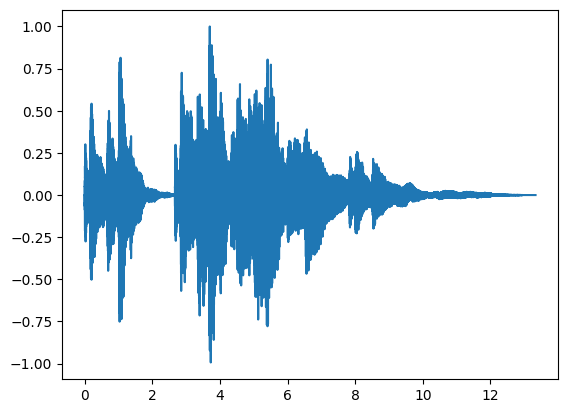

In [78]:
wave.plot()

Выделим полусекундный сегмент, где высота постоянна.

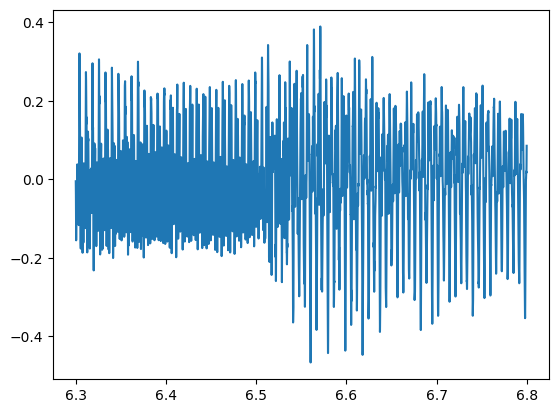

In [79]:
segment = wave.segment(6.3,0.5)
segment.plot()
segment.make_audio()

Вычислим и выведем спектр выделенного сегмента:

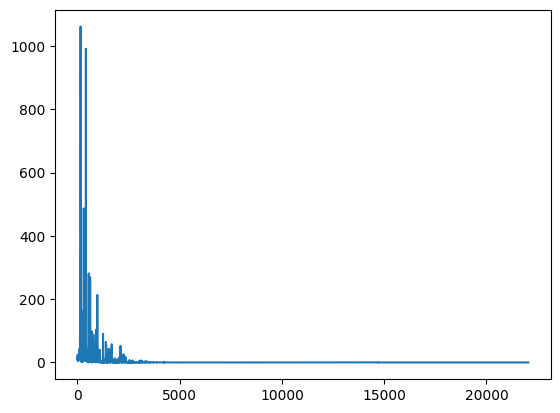

In [80]:
spectrum = segment.make_spectrum()
spectrum.plot()

Исходя из спектра, можно сделать вывод, что звук локализован примерно в первых 2000 кГц. Выведем спектр этого диапазона:

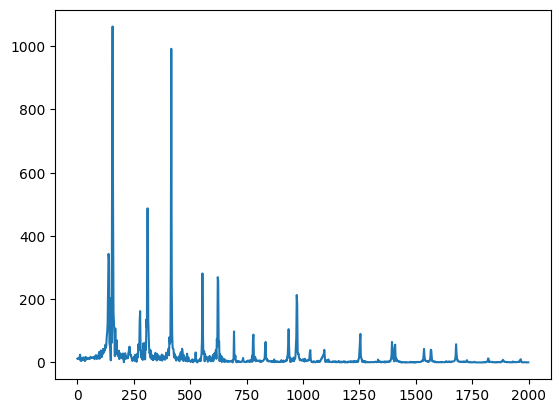

In [81]:
spectrum.plot(high = 2000)

Приблизим диаграмму до 1 кГц:

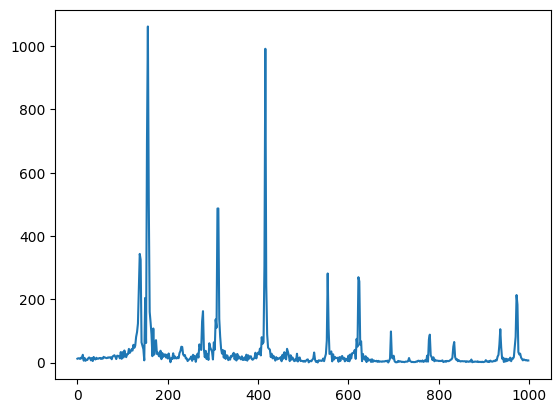

In [82]:
spectrum.plot(1000)

Выделим доминирующую частоту:

In [83]:
spectrum.peaks()[:3]

[(1062.1626957722112, 156.0),
 (991.6789695548692, 416.0),
 (694.7981600770795, 154.0)]

Видно, что доминирующая частота - 156 Гц

Воспользуемся low_pass, тем самым отфильтруем всё, что выше 2 кГц:

In [84]:
spectrum.low_pass(2000)
filtered = spectrum.make_wave()

Сравним исходный звук (первый) и получившийся отфильтрованный (второй):

In [85]:
segment.make_audio()

In [86]:
filtered.make_audio()

Видно, что звук стал немного более приглушенным. Все из-за того, что с обрезанием частот изменилась форма сигнала и его тембр.

Теперь воспользуемся high_pass и band_stop для исходного выделенного сегмента. Посмотрим на получившуюся диаграмму и послушаем, какой звук получился после одновременной фильтрации с помощью фильтра высоких частот (первый метод) и полосно-заграждающего фильтра (второй метод).

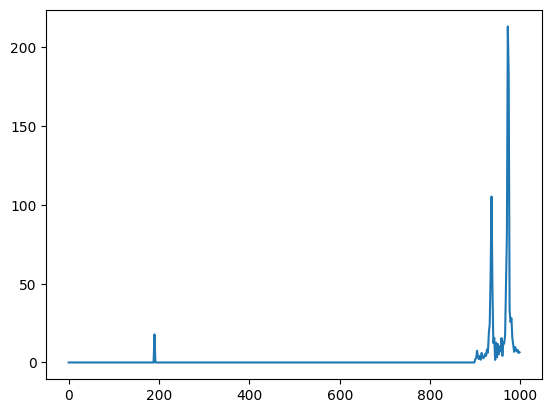

In [87]:
edited = segment.make_spectrum()
edited.high_pass(190)
edited.band_stop(190,900)
edited.plot(1000)
edited.make_wave().make_audio()

Слышно, что звук стал очень звонким и тонким, так как мы обрезали большую часть частот и оставили основные.

# **Упражнение 1.3**
Создайте сложный сигнал из объектов SinSignal и CosSignal, суммируя их. Обработайте сигнал для получения wave и прослушайте его. Вычислите Spectrum и распечатайте. Что произойдет при добавлении частот, не кратных основным?

Соединим 4 ноты: фа, соль, ля, си и отобразим, что получится

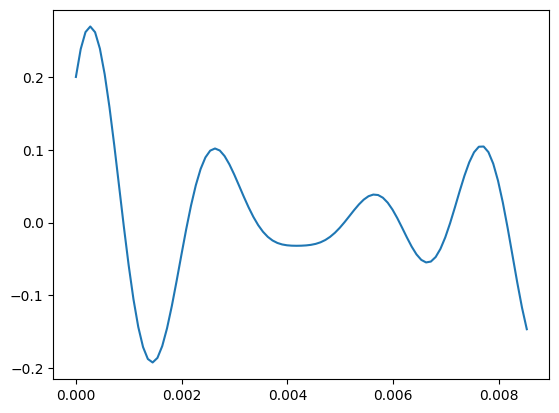

In [88]:
from thinkdsp import SinSignal, CosSignal

sin_FA = SinSignal(freq=349 , amp=0.1)
cos_SOL = CosSignal(freq=392, amp=0.1)
sin_LA = SinSignal(freq=440, amp=0.1)
cos_SI = CosSignal(freq=494, amp=0.1)

my_signal = sin_FA + cos_SOL + sin_LA + cos_SI
my_signal_wave = my_signal.make_wave(duration=1)
my_signal.plot()
my_signal_wave.make_audio()

Вычислим и распечатаем Spectrum:

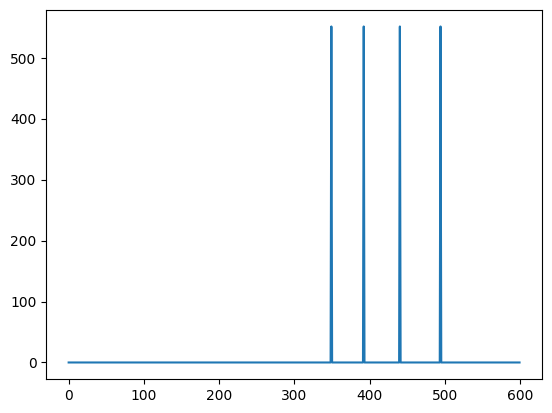

In [91]:
spectrum = my_signal_wave.make_spectrum()
spectrum.plot(high = 600)

Попробуем добавить в аккорд ноту, не входящую в него, которую можно считать некратной остальным частотам аккорда. Посмотрим и послушаем, что получилось:

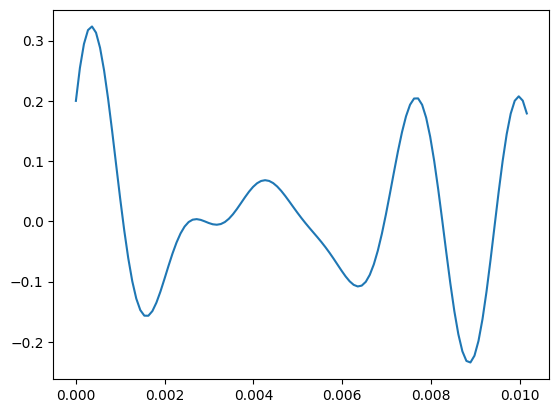

In [90]:
sin_RO = SinSignal(freq=293.7,amp=0.1)
newSignal = my_signal + sin_RO
newSignal_wave = newSignal.make_wave(duration=1)
newSignal.plot()
newSignal_wave.make_audio()

Получится более отчетливое и полное звучание

Посмотрим его спектограмму

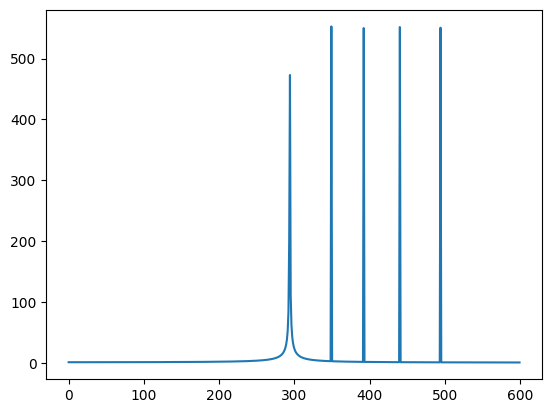

In [92]:
spectrum = newSignal_wave.make_spectrum()
spectrum.plot(high = 600)

# **Упражнение 1.4**
Напишите функцию stretch, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ts и framerate. Подсказка: должно получиться всего 2 строки кода.

Ниже представлена получившаяся функция:

In [93]:
def stretch(wave, factor):
  wave.ts *= factor
  wave.framerate /= factor

Проверим её на нашем первоначальном звуке. Для начала выведем сам звук и его спектрограмму:

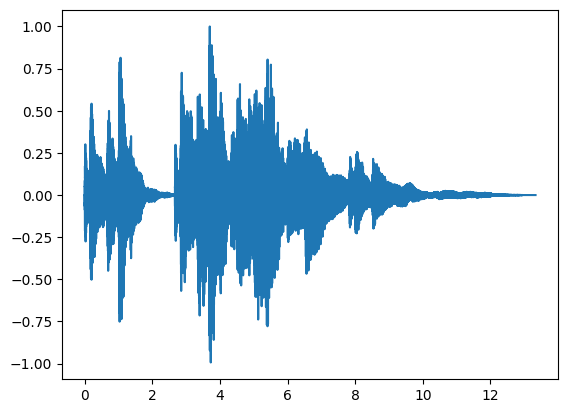

In [94]:
wave = read_wave('149926__setuniman__piano-jingle-0l_16.wav')
wave.plot()
wave.make_audio()

Теперь ускорим наш звук в 2 раза:

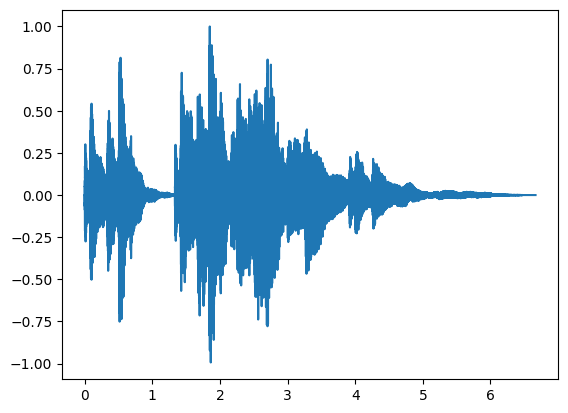

In [95]:
stretch(wave, 0.5)
wave.plot()
wave.make_audio()

Теперь наоборот, замедлим в 2 раза:

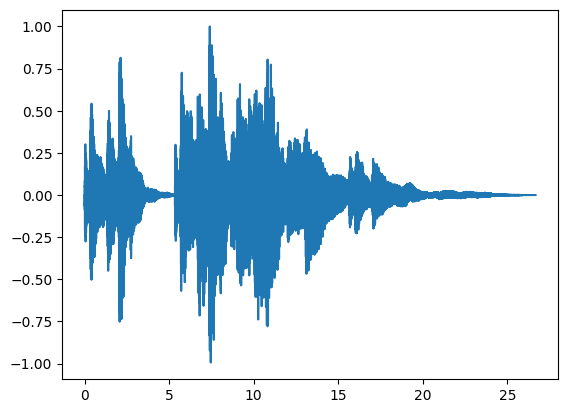

In [97]:
stretch(wave, 2)
wave.plot()
wave.make_audio()